# Machine Learning Project 2021
##### Davide Raffaelli
## Predicting taxonomic identity and genetic composition based on codon usage bias levels

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df = pd.read_csv("train.csv")
df.drop('Unnamed: 0', inplace=True, axis=1)
df.drop("SpeciesID", inplace=True, axis=1)
df.drop("SpeciesName", inplace=True, axis=1)
df
kingdoms = np.unique(df.iloc[:,0:1])

,Kingdom,DNAtype,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,6686,0.01541,0.00927,0.01720,0.01825,0.01436,0.02303,0.01555,...,0.00643,0.02064,0.01182,0.02812,0.00838,0.03365,0.01974,0.01511,0.00030,0.00030
1,inv,0,10060,0.01213,0.02515,0.00268,0.01352,0.01372,0.01143,0.00775,...,0.00268,0.00915,0.01412,0.03280,0.02555,0.03708,0.05398,0.03330,0.00030,0.00050
2,bct,0,14031,0.02580,0.01618,0.03606,0.01354,0.00848,0.02067,0.01041,...,0.00114,0.01775,0.00499,0.03756,0.02523,0.05388,0.01946,0.02245,0.00121,0.00086
3,bct,0,39839,0.00128,0.02141,0.01225,0.01649,0.01330,0.01308,0.00399,...,0.01177,0.00705,0.00422,0.03316,0.02229,0.03444,0.02370,0.00831,0.00028,0.00063
4,vrt,1,5112,0.03169,0.01780,0.03893,0.00000,0.06240,0.01056,0.05262,...,0.00000,0.00000,0.00000,0.00020,0.01389,0.02465,0.00352,0.00352,0.00000,0.02465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10417,pln,0,1791,0.02289,0.02959,0.00614,0.02680,0.01452,0.02178,0.00558,...,0.00558,0.00893,0.01173,0.03071,0.01954,0.01787,0.02848,0.03127,0.00112,0.00000
10418,vrl,0,68352,0.02532,0.01557,0.00878,0.01185,0.01160,0.02654,0.00979,...,0.00477,0.01274,0.01008,0.02070,0.00726,0.02388,0.02233,0.01814,0.00025,0.00038
10419,bct,0,2292,0.01614,0.02618,0.00131,0.01003,0.02661,0.01658,0.00218,...,0.01702,0.00175,0.00567,0.02487,0.00000,0.02661,0.02618,0.01353,0.00000,0.00349
10420,pln,2,1022,0.00196,0.01761,0.04501,0.03131,0.02544,0.00978,0.01761,...,0.00391,0.01566,0.00391,0.02348,0.01957,0.03523,0.00978,0.00196,0.00000,0.00196


Let's check if there are some NAs

In [3]:
np.any(df.isna(), axis=1).sum()

0

We order by kingdom to have a nice plot.

In [4]:
df.sort_values(by = ["Kingdom"], inplace = True, ignore_index=True)

## Data visualization

Choose colors

In [5]:
colors=sns.color_palette("tab10", 11)

Plot samples

<AxesSubplot:xlabel='Kingdom', ylabel='count'>

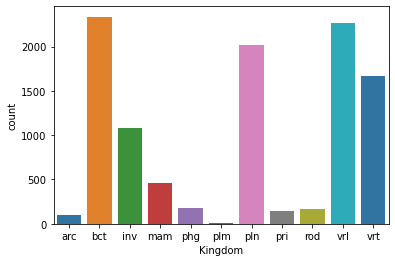

In [6]:
sns.countplot(x="Kingdom",data=df,palette=colors)

<AxesSubplot:xlabel='DNAtype', ylabel='count'>

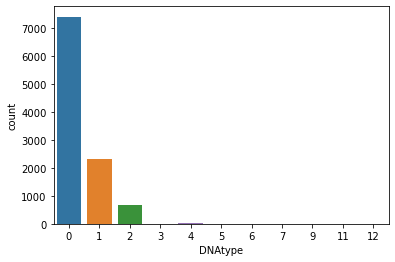

In [7]:
sns.countplot(x="DNAtype",data=df,palette=colors)

As we can see, the outcomes are unbalanced, so we have to keep in mind this when we do our analysis.

Correlation between covariates

<AxesSubplot:>

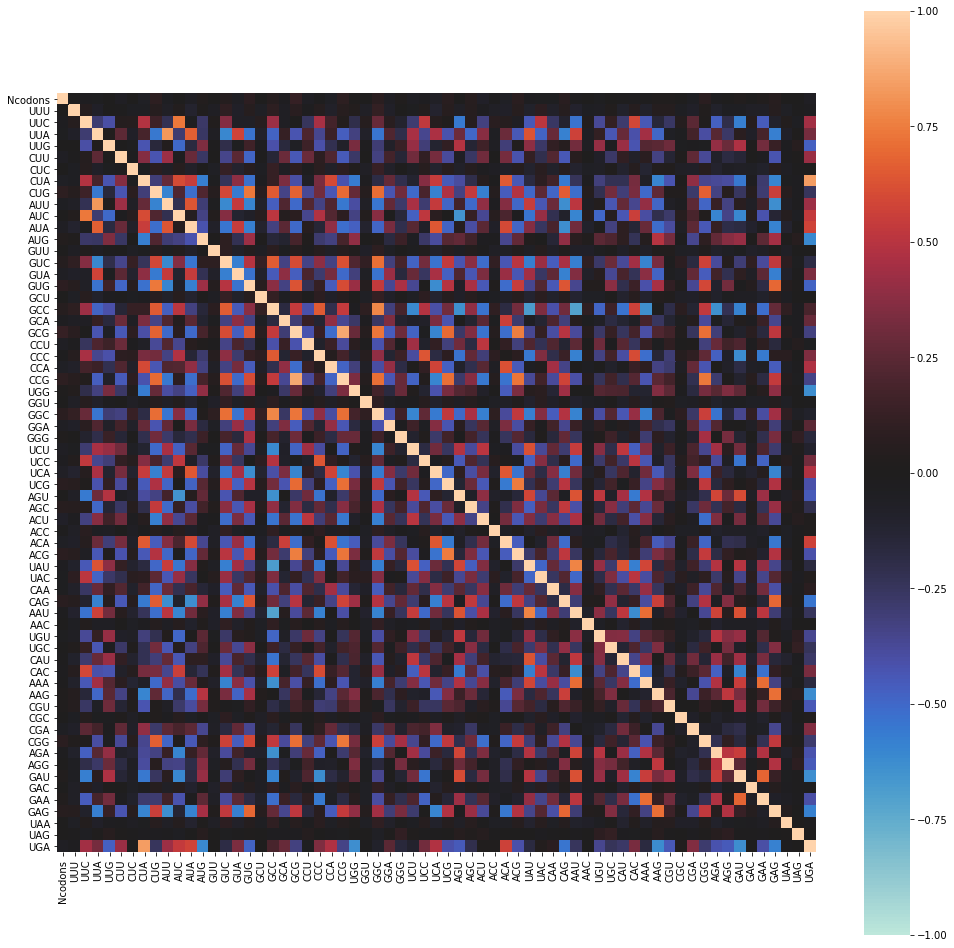

In [8]:
fig=plt.figure(figsize=(17,17))
cormat=df.iloc[:,2:].corr()
sns.heatmap(cormat,vmin=-1,vmax=1,square=True, cmap = sns.color_palette("icefire", as_cmap=True))

As we can see we have some covariates that are highly correlated, indicating that there can be collinearity. Now we want to know the pair of covariates that are most correlated.

In [9]:
cov_names = list(cormat)
cov_correlated = []
for r in range(len(cov_names)):
    for c in range(r+1,len(cov_names)):
        if cormat.iloc[r,c] > 0.7 or cormat.iloc[r,c] < -0.7:
            cov_correlated.append([cov_names[r],cov_names[c]])
print(cov_correlated)

[['UUC', 'AUC'], ['UUA', 'AUU'], ['CUA', 'UGA'], ['CUG', 'GUG'], ['CUG', 'GGC'], ['GUC', 'GGC'], ['GCC', 'GGC'], ['GCC', 'AAU'], ['GCG', 'CCG'], ['GCG', 'GGC'], ['GCG', 'ACG'], ['GCG', 'CGG'], ['CCG', 'GGC'], ['CCG', 'UCG'], ['CCG', 'ACG'], ['CCG', 'CGG'], ['UCG', 'ACG'], ['UAU', 'AAU'], ['AAU', 'AAA'], ['AAA', 'GAA'], ['AAG', 'GAG']]


Now we want to see how much the covariates vary.

Plot means

Text(0.5, 1.0, 'Dot Plot for Protein Mean')

Text(0.5, 0, 'Mean')

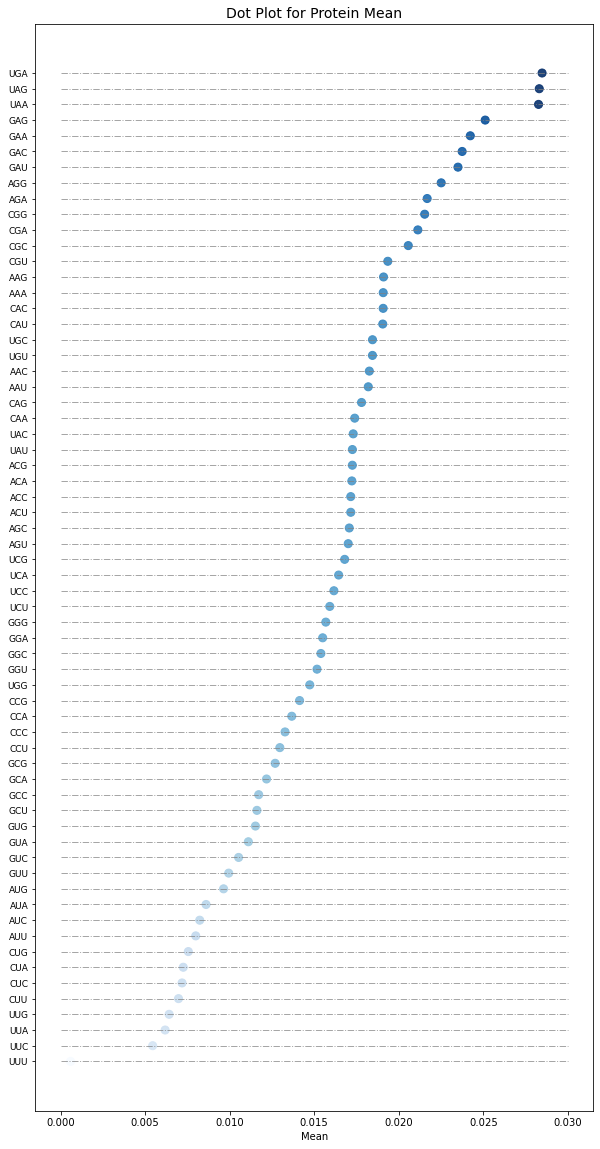

In [10]:
avgs = df.iloc[:,3:].mean(axis = 0)
avgs.sort_values(ascending = True, inplace = True)

fig, ax = plt.subplots(figsize=(10,20))

ax.hlines(y=list(df)[3:], xmin = 0,xmax = 0.03,color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=list(df)[3:], x=avgs.values, s=65, c=avgs.values, cmap='Blues', alpha=0.9)

# Title, Label, Ticks and Ylim
ax.set_title('Dot Plot for Protein Mean', fontdict={'size':14})
ax.set_xlabel('Mean')
ax.tick_params(axis='y', which='major', labelsize=9)

Plot distributions

[Text(0.5, 0, 'measure'), Text(0, 0.5, 'protein')]

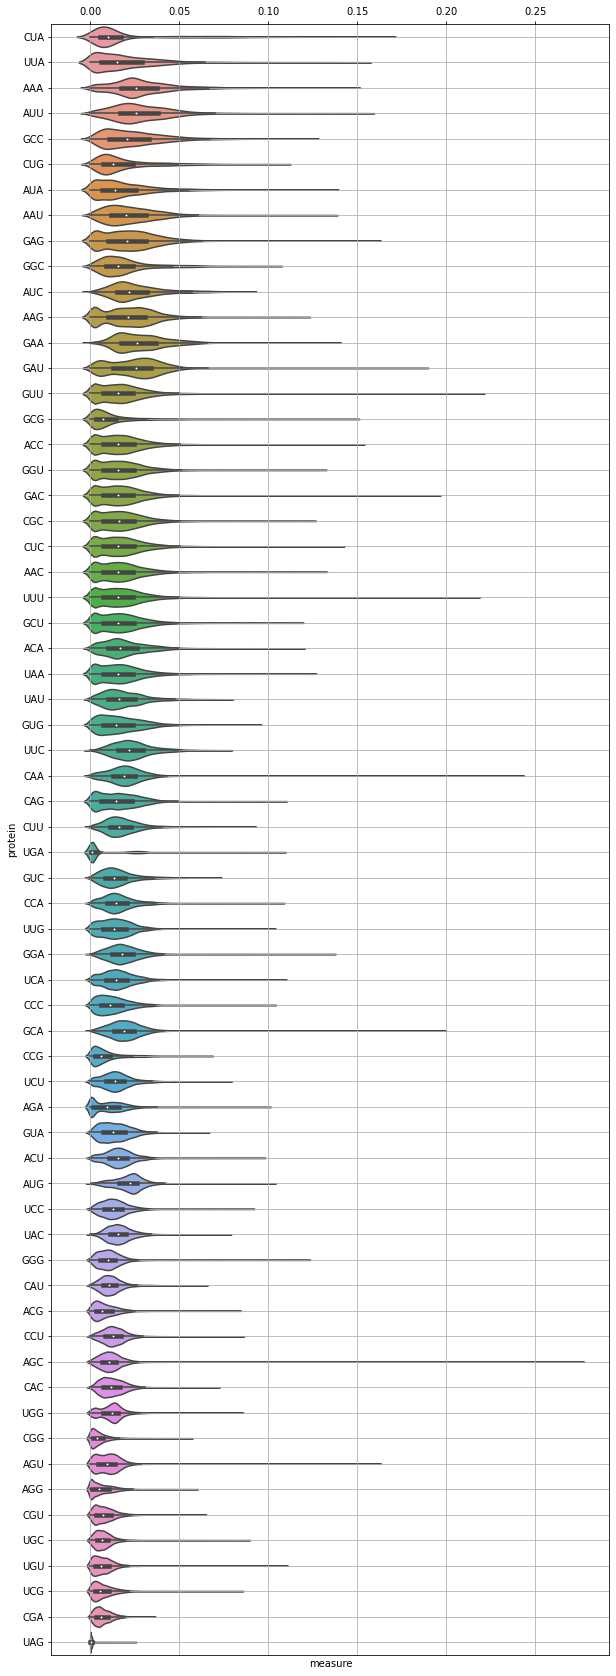

In [11]:
variances = df.iloc[:,3:].var()
variances.sort_values(ascending = False, inplace = True)

fig=plt.figure(figsize=(10,30))
a=sns.violinplot(data=df.iloc[:,3:],orient="h",scale="count", order=variances.index.tolist())
a.set(xlabel='measure', ylabel='protein')
a.xaxis.set_ticks_position('top')
plt.grid()

As we can see we have to standardize the data if we want to use methods like PCA, even if we exclude Ncodons

With the mutual info criteria we order the covariates in order of importance. First for all classes, then for each class.

In [12]:
from sklearn.feature_selection import mutual_info_classif

train = df.iloc[:,2:]
mi_index = mutual_info_classif(train, df["Kingdom"])
#we get a sorted index of this list from highest to lowest
imp_cov_king = mi_index.argsort()[::-1]
#we get a list of proteins sorted by highest MI
imp_cov_king=list(train.columns[imp_cov_king])
#we check the first 20 proteins
print(imp_cov_king)

['CUA', 'AGG', 'UGA', 'AGA', 'AAG', 'GAU', 'UGU', 'ACA', 'GCG', 'GAG', 'CAG', 'CCA', 'CGU', 'AUA', 'UGG', 'AAA', 'AUC', 'GCC', 'CCG', 'GGC', 'Ncodons', 'UUG', 'GAA', 'ACG', 'AGU', 'UCG', 'UCA', 'GUG', 'AUG', 'UUC', 'UUA', 'UCU', 'CGG', 'CUU', 'AAU', 'CCC', 'CUG', 'CGA', 'UGC', 'AUU', 'CAU', 'GGA', 'CAA', 'UCC', 'CAC', 'UAU', 'ACU', 'CCU', 'AGC', 'GUA', 'GCA', 'GUC', 'UAC', 'GGG', 'GCU', 'UUU', 'CUC', 'UAA', 'GUU', 'CGC', 'UAG', 'ACC', 'GGU', 'GAC', 'AAC']


In [13]:
mi_index = mutual_info_classif(train, df["DNAtype"])
#we get a sorted index of this list from highest to lowest
imp_cov_dnat = mi_index.argsort()[::-1]
#we get a list of proteins sorted by highest MI
imp_cov_dnat=list(train.columns[imp_cov_dnat])
#we check the first 20 proteins
print(imp_cov_dnat)

['UGA', 'AAG', 'GAG', 'CUA', 'CAG', 'AGG', 'UGG', 'GUG', 'AUA', 'GAU', 'AGA', 'GCG', 'ACG', 'AUG', 'CGU', 'CCG', 'ACA', 'UUA', 'UUG', 'AUU', 'CGA', 'UCG', 'GAA', 'AGC', 'AGU', 'UGC', 'AAA', 'UCA', 'GUA', 'GGC', 'CGG', 'AUC', 'CUU', 'Ncodons', 'UGU', 'CCA', 'CUG', 'GCC', 'GUC', 'CAU', 'CAC', 'UUC', 'UAU', 'UCU', 'AAU', 'CCC', 'GCA', 'CAA', 'GGA', 'UAC', 'GGG', 'UCC', 'GCU', 'ACU', 'ACC', 'CUC', 'GUU', 'CCU', 'AAC', 'UAA', 'CGC', 'UUU', 'GAC', 'GGU', 'UAG']


It seems that the significative covariates for one outcome tend to be significative even for the other outcome. This means that if we want to build models that will give us information about Kingdom performing feature selection we expect that the selected covaraites are more or less the sames if we want to build model for DNAtype.

Now we see which ones between the correlated covariates are less important, in order to understand which variables are those that we expect that don't bring particular information.

In [14]:
less_imp_corr_covs = set()
for pair in cov_correlated:
    if (imp_cov_king.index(pair[0]) + imp_cov_dnat.index(pair[0]) <= 
        imp_cov_king.index(pair[1]) + imp_cov_dnat.index(pair[1])) :
        less_imp_corr_covs.add(pair[1])
    else :
        less_imp_corr_covs.add(pair[0])

print(less_imp_corr_covs)

{'GGC', 'GUC', 'GAA', 'CUG', 'UUC', 'GCC', 'ACG', 'GAG', 'AAU', 'CGG', 'UCG', 'CUA', 'UAU', 'AUU', 'CCG'}


## Clustering

### Hierarchical

The first method of clustering that we use to study if there are structures in the data that allow samples from different classes (both DNA type and Kingdom) to be easily identified is the hierarchical clustering.

Since we want to know if the DNA type or the Kingdom can be identified we know the number of clusters that we want to obtain, so there is no particular reason to use the hierarchical clustering because when we know the number of clusters we expect that this method will give us poorer results compared to other clustering techniques. However, here we use this method anyway, just to check the differences between the results of this method compared to the others.

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [16]:

def plot_dendrogram(Z=None, model=None, X=None, **kwargs):
    annotate_above = kwargs.pop('annotate_above', 0)

    # Reconstruct the linakge matrix if the standard model API was used
    if Z is None:
        if hasattr(model, 'distances_') and model.distances_ is not None:
            # create the counts of samples under each node
            counts = np.zeros(model.children_.shape[0])
            n_samples = len(model.labels_)
            for i, merge in enumerate(model.children_):
                current_count = 0
                for child_idx in merge:
                    if child_idx < n_samples:
                        current_count += 1  # leaf node
                    else:
                        current_count += counts[child_idx - n_samples]
                counts[i] = current_count

            Z = np.column_stack([model.children_, model.distances_,
                                              counts]).astype(float)
        else:
            Z = linkage(X, method=model.linkage, metric=model.affinity)
    
    if 'n_clusters' in kwargs:
        n_clusters = kwargs.pop('n_clusters')
        # Set the cut point just above the last but 'n_clusters' merge
        kwargs['color_threshold'] = Z[-n_clusters, 2] + 1e-6
    
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    # Plot the corresponding dendrogram
    ddata = dendrogram(Z, ax=ax, **kwargs) 
    
    # Annotate nodes in the dendrogram
    for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
        x = 0.5 * sum(i[1:3])
        y = d[1]
        nid = np.where(Z[:,2] == y)[0][0]
        if y > annotate_above:
            plt.plot(x, y, 'o', c=c)
            plt.annotate(str(nid-Z.shape[0]), (x, y), xytext=(0, -5),
                         textcoords='offset points',
                         va='top', ha='center')
    if kwargs['color_threshold']:
        plt.axhline(y=kwargs['color_threshold'], c='k')
    
    return fig, ax
   

Text(0.5, 1.0, 'single')

Text(0.5, 1.0, 'average')

Text(0.5, 1.0, 'complete')

Text(0.5, 1.0, 'centroid')

Text(0.5, 1.0, 'ward')

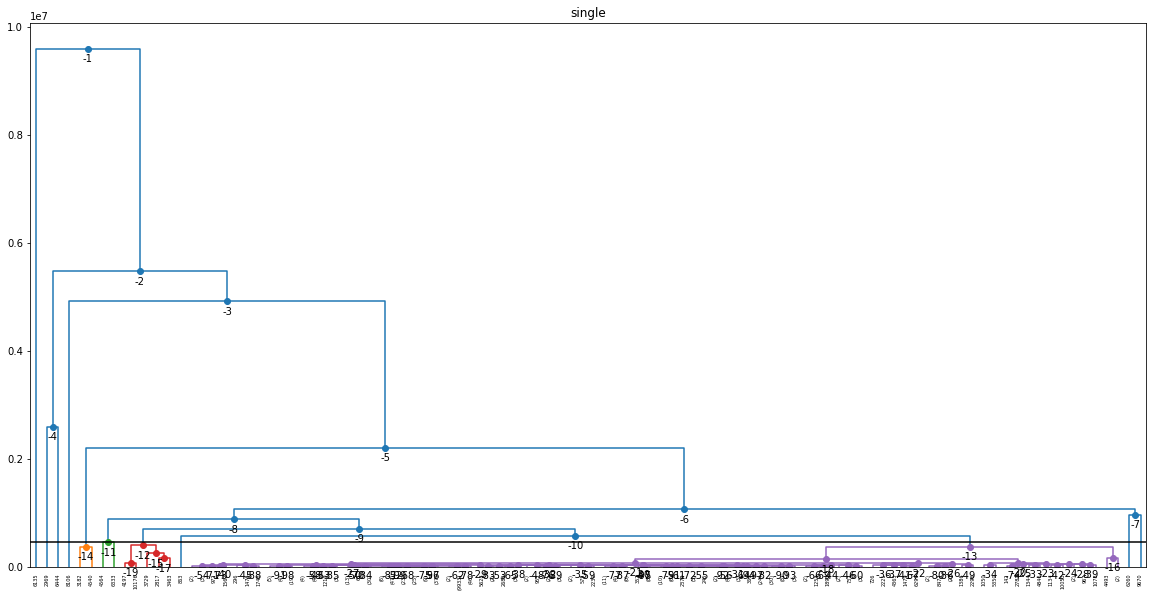

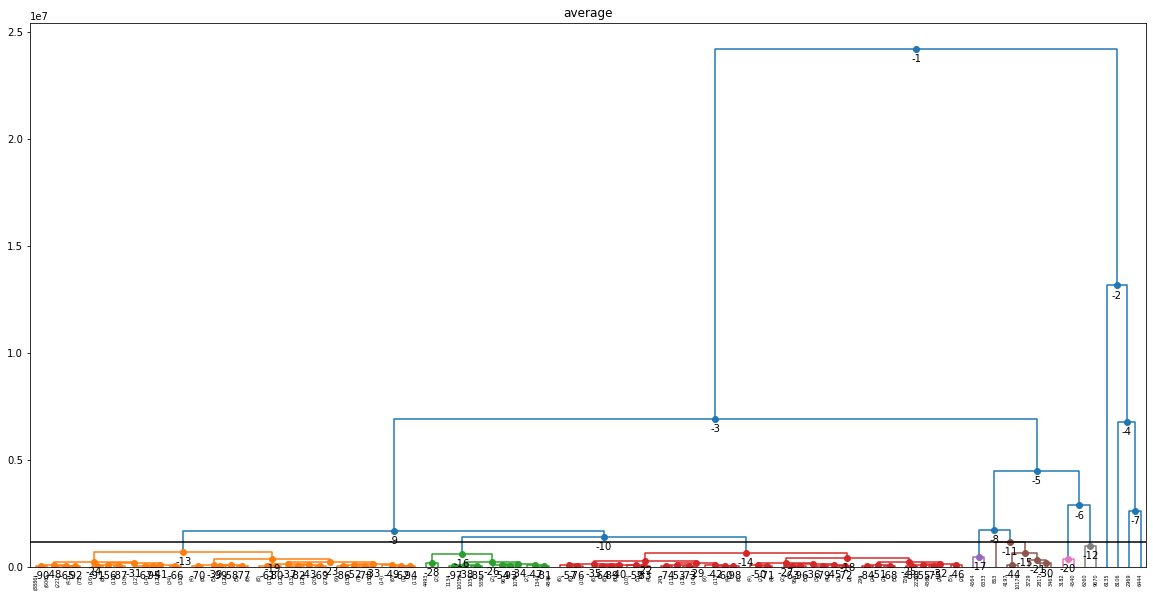

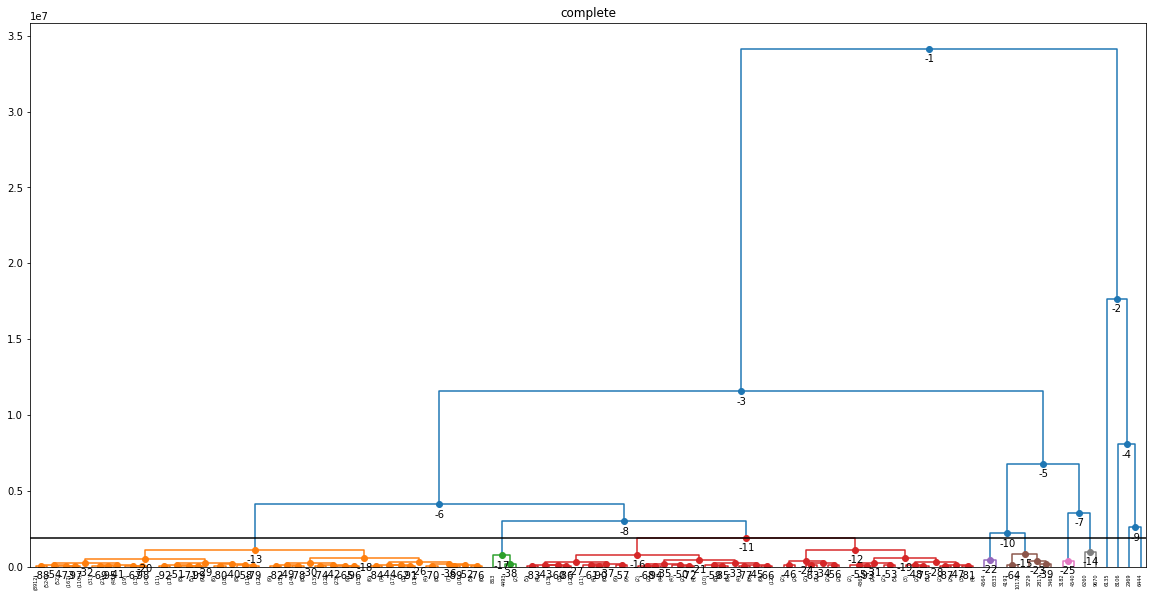

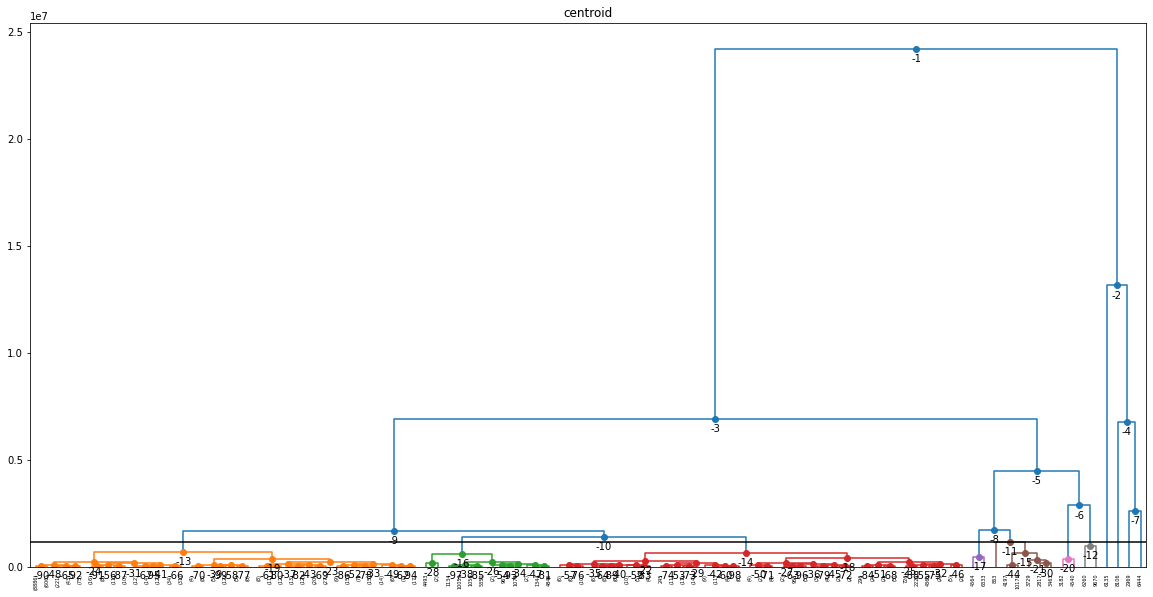

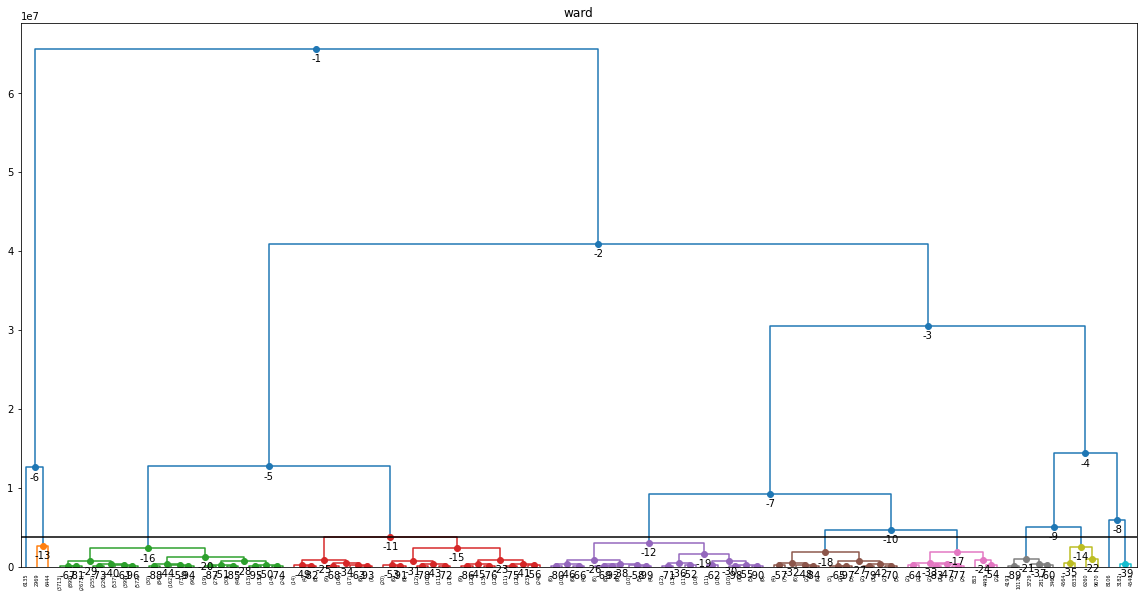

In [17]:
methods = ['single', 'average', 'complete', 'centroid', 'ward']
X = df.iloc[:,2:]
for method in methods:
    Z = linkage(X, metric='euclidean', method=method)
    fig, ax = plot_dendrogram(Z=Z, X=X, truncate_mode='lastp', 
                              p=100, n_clusters=11)
    ax.set_title(method)

We want now to use standardize data, since Ncodons measurement is not comparable with the frequencies.

In [18]:
X = df.iloc[:,2:]
X = (X-X.mean())/ X.std()
X.head()

,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,-0.091199,-1.193490,-0.022516,-0.958667,-1.113837,-1.397142,-0.451259,-0.761662,0.571185,-1.396358,...,1.120120,-1.037883,-0.878946,-0.888588,4.647393,-0.308889,2.528489,-1.229970,0.087605,-0.462803
1,0.690766,1.359350,0.010002,-0.796824,-0.777922,-0.234061,-0.122670,0.046371,0.701844,-1.139522,...,-0.029957,0.170548,7.225255,-0.729805,-0.864251,-1.194833,2.914083,-0.958983,1.406264,-0.518672
2,-0.103453,0.401940,-0.596728,0.627396,-0.018885,-0.120799,0.803083,-0.099050,-0.755978,-0.040423,...,-0.730069,1.005633,0.120739,0.237332,-0.918866,1.444119,-0.124324,0.138088,-0.097661,-0.396338
3,0.755571,-1.179835,-0.793551,-0.175539,0.009107,0.249445,0.232927,-0.011551,-0.304114,-0.661727,...,-0.023855,2.008200,2.294310,-0.454098,-0.139291,-0.345950,1.655190,0.339590,0.730588,-0.499407
4,0.769937,-1.218526,0.300959,-0.185685,0.056480,0.337961,0.094890,-0.025518,-0.475302,-0.408878,...,-0.734645,0.800932,4.728395,0.237332,1.638321,0.508528,2.079076,0.260842,0.065809,-0.432942


Text(0.5, 1.0, 'single')

Text(0.5, 1.0, 'average')

Text(0.5, 1.0, 'complete')

Text(0.5, 1.0, 'centroid')

Text(0.5, 1.0, 'ward')

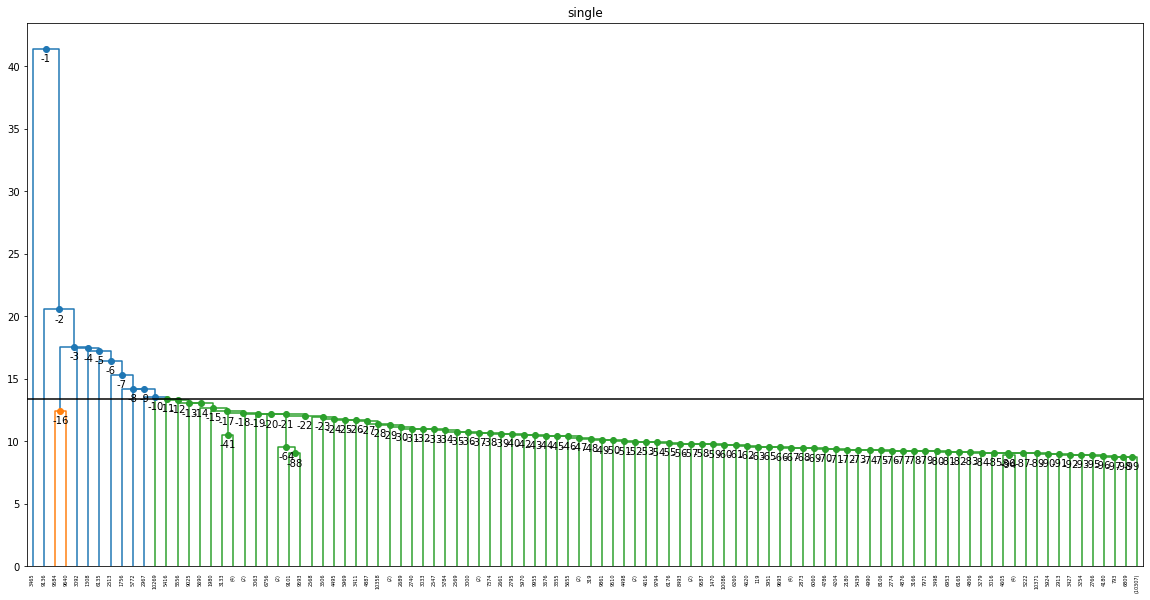

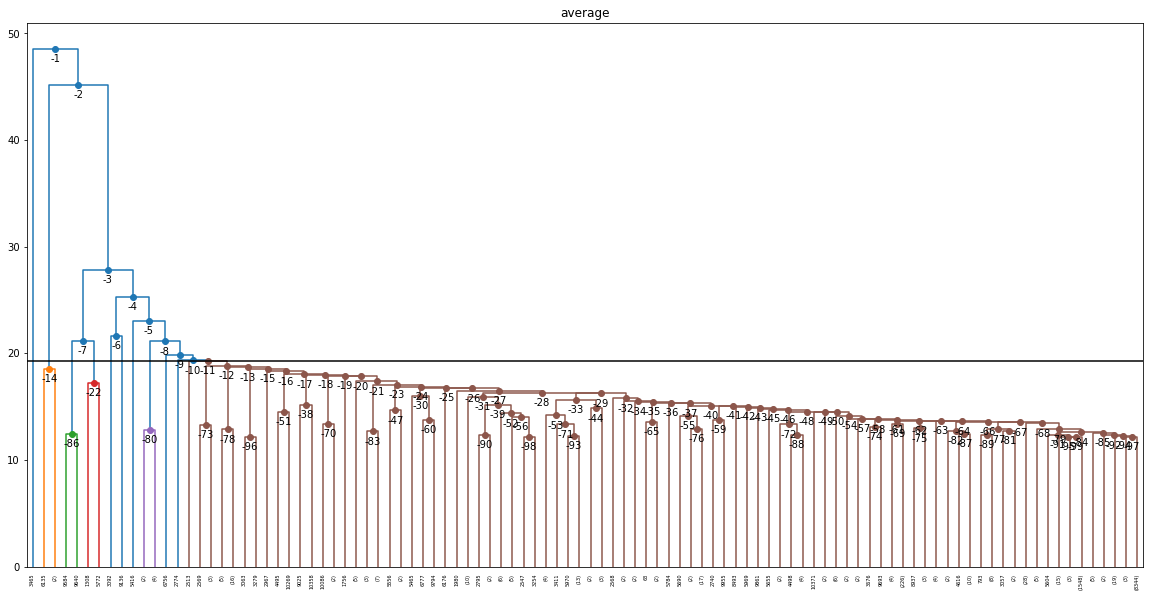

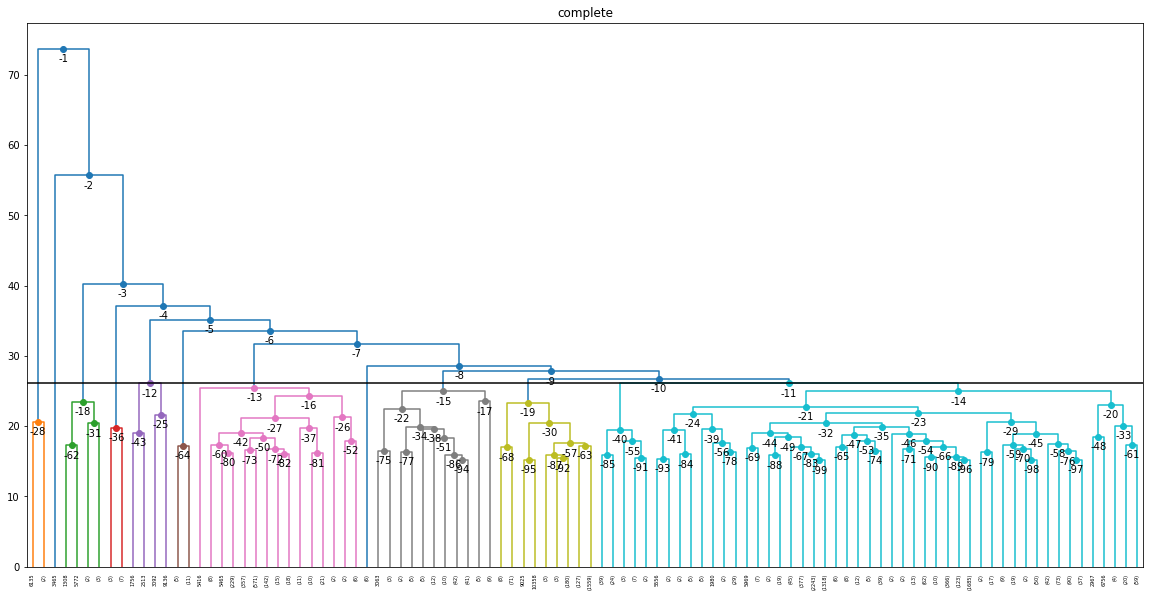

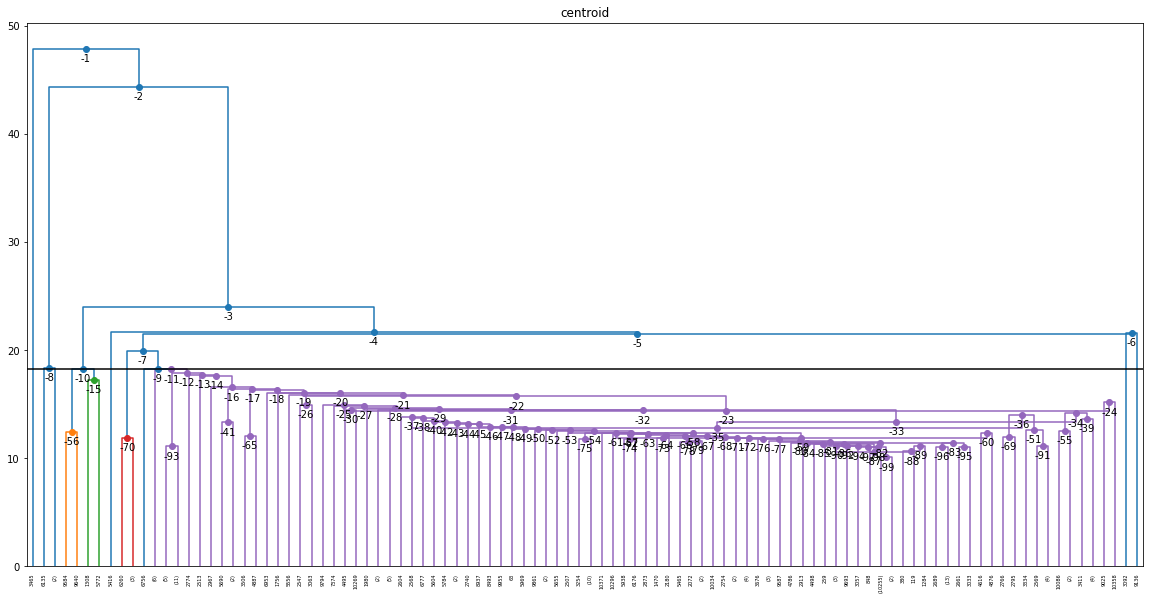

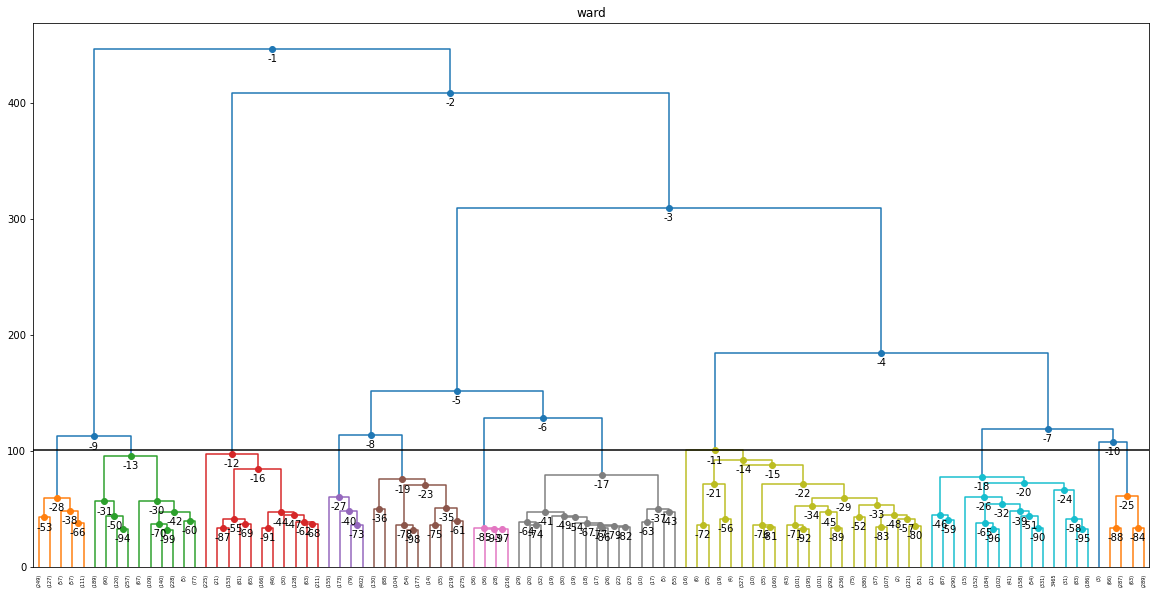

In [19]:
## Dendograms Euclidean Distance
for method in methods:
    L = linkage(X, metric='euclidean', method=method)
    fig, ax = plot_dendrogram(Z=L, X=X, truncate_mode='lastp', 
                              p=100, n_clusters=11)

    ax.set_title(method)


In order to evaluate the goodness of the results, we write some function that calculate the typical indexes for assess GOF of clustering.

Correlation and similarity martix

In [20]:
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import normalize

def incidence_mat(y_pred):
    npoints = y_pred.shape[0]
    mat = np.zeros([npoints, npoints])
    # Retrieve how many different cluster ids there are
    clusters = np.unique(y_pred)
    nclusters = clusters.shape[0]
    
    for i in range(nclusters):
        sample_idx = np.where(y_pred == i)
        # Compute combinations of these indices
        idx = np.meshgrid(sample_idx, sample_idx)
        mat[idx[0].reshape(-1), idx[1].reshape(-1)] = 1
        
    return mat

def similarity_mat(X, metric):
    dist_mat = pairwise_distances(X, metric=metric)
    min_dist, max_dist = dist_mat.min(), dist_mat.max()
    
    # Normalize distances in [0, 1] and compute the similarity
    sim_mat = 1 - (dist_mat - min_dist) / (max_dist - min_dist)
    return sim_mat

def correlation(X, y_pred, metric):
    inc = incidence_mat(y_pred)
    sim = similarity_mat(X, metric)
    
    # Note: we can eventually remove duplicate values
    # only the upper/lower triangular matrix
    # triuidx = np.triu_indices(y_pred.shape[0], k=1)
    # inc = inc[triuidx]
    # sim = sim[triuidx]
    
    inc = normalize(inc.reshape(1, -1))
    sim = normalize(sim.reshape(1, -1))
    corr = (inc @ sim.T)
    return corr[0,0]

def sorted_sim(sim, y_pred):
    idx_sorted = np.argsort(y_pred)
    # Sort the rows
    sim = sim[idx_sorted]
    # Sort the columns
    sim = sim[:, idx_sorted]
    
    return sim

def plot_sorted_mat(sim, y_pred):
    sim = sorted_sim(sim, y_pred)
    
    fig, ax = plt.subplots(figsize=(40,30))  
    ax = sns.heatmap(sim, ax=ax)
    # Remove ruler (ticks)
    ax.set_yticks([]) 
    ax.set_xticks

Internal indexes

In [21]:
from sklearn.metrics import silhouette_score


def wss(X, y_pred, metric):
    ncluster = np.unique(y_pred).shape[0]
    err = 0
    for k in range(ncluster):
        # All the points of this cluster
        X_k = X[y_pred == k]
        # Distances of all points within the cluster
        dist_mat = pairwise_distances(X_k, metric=metric)
        # Select the lower triangular part of the matrix
        triu_idx = np.tril_indices(dist_mat.shape[0], k=1)
        err += (dist_mat[triu_idx] ** 2).sum()
    
    return err

def bss(X, y_pred, metric):
    ncluster = np.unique(y_pred).shape[0]
    # Sort the distance matrix (as we did for the simiarity)
    dist_mat = pairwise_distances(X, metric=metric) ** 2
    dist_mat = sorted_sim(dist_mat, y_predict)
    y_sort = np.sort(y_pred)
    
    err = 0
    for k in range(ncluster):
        kidx = np.where(y_sort == k)[0]
        start, end = kidx[0], kidx[-1]
        err += dist_mat[start:end, end+1:].sum()
    
    return err

External indexes

In [22]:
def get_Ncounts(y_predict, y_true, k, j=None):
    N = y_true.shape[0]
    Nk_mask = y_predict == k
    Nk = Nk_mask.sum()
    Nj, Nkj = None, None
    if j is not None:
        Nj_mask = y_true == j
        Nj = Nj_mask.sum()
        Nkj = np.logical_and(Nj_mask, Nk_mask).sum()
    return N, Nk, Nj, Nkj

def precision(y_predict, y_true, k, j):
    N, Nk, Nj, Nkj = get_Ncounts(y_predict, y_true, k, j)
    return Nkj / (Nk + 1e-8)
    
def recall(y_predict, y_true, k, j):
    N, Nk, Nj, Nkj = get_Ncounts(y_predict, y_true, k, j)
    return Nkj / (Nj + 1e-8)

def F(y_predict, y_true, k, j):
    p = precision(y_predict, y_true, k, j)
    r = recall(y_predict, y_true, k, j)
    return (2*p*r) / (p+r)

def purity(y_predict, y_true, k):
    cls = np.unique(y_true)
    prec = [precision(y_predict, y_true, k, j) for j in cls]
    return max(prec)

def tot_purity(y_predict, y_true):
    N = y_true.shape[0]
    nc = len(np.unique(y_true))
    p = 0
    for k in range(nc):
        N, Nk, _, _ = get_Ncounts(y_predict, y_true, k)
        pk = purity(y_predict, y_true, k)
        p += (Nk / N) * pk
    return p

After defining the indexes, we calculate them for each linkage with euclidian and manhattan distance in order to assert which method is the best.

In [23]:
from sklearn.cluster import AgglomerativeClustering

methods = ['single', 'average', 'complete','ward']

for method in methods:
    hierarchical_model = AgglomerativeClustering(n_clusters=11, 
                                distance_threshold=None, 
                                affinity='euclidean', linkage=method)
    y_pred =  hierarchical_model.fit_predict(X) 
    print("Purity Kingdom {}".format(method), tot_purity(y_pred, df["Kingdom"]))
    print("Purity DNA type {}".format(method), tot_purity(y_pred, df["DNAtype"]))
    print("Avg Silhoutte {}: {}".format(method, silhouette_score(X, y_pred, metric='euclidean')))

Purity Kingdom single 0.22500479753384744
Purity DNA type single 0.71099597005305
Avg Silhoutte single: 0.3817772245851177
Purity Kingdom average 0.22558050277388433
Purity DNA type average 0.7115716752924471
Avg Silhoutte average: 0.4071877604793931
Purity Kingdom complete 0.4402226060188087
Purity DNA type complete 0.9106697370846086
Avg Silhoutte complete: 0.2080829053973598
Purity Kingdom ward 0.5645749376252958
Purity DNA type ward 0.950969103808799
Avg Silhoutte ward: 0.06454176790306572


In [24]:
methods = ['single', 'average', 'complete']

for method in methods:
    hierarchical_model = AgglomerativeClustering(n_clusters=11, 
                                distance_threshold=None, 
                                affinity='manhattan', linkage=method)
    y_pred =  hierarchical_model.fit_predict(X) 
    print("Purity Kingdom {}".format(method), tot_purity(y_pred, df["Kingdom"]))
    print("Purity DNA type {}".format(method), tot_purity(y_pred, df["DNAtype"]))
    print("Avg Silhoutte {}: {}".format(method, silhouette_score(X, y_pred, metric='manhattan')))

Purity Kingdom single 0.22529265015330624
Purity DNA type single 0.7114757244188145
Avg Silhoutte single: 0.24632170440083204
Purity Kingdom average 0.22586835539334316
Purity DNA type average 0.711955478784579
Avg Silhoutte average: 0.24068363987214378
Purity Kingdom complete 0.3374592208722016
Purity DNA type complete 0.739877182872703
Avg Silhoutte complete: 0.08680715314372328


We now print the similarity matrix for the best result. The best results  in term of purity are those of euclidian distance with ward linkage, while in term of silouette score is the euclidian average.

In [ ]:
sim = similarity_mat(X, 'euclidean')
hierarchical_model = AgglomerativeClustering(n_clusters=11, 
                            distance_threshold=None, 
                            affinity='euclidean', linkage="ward")
y_pred =  hierarchical_model.fit_predict(X)
plot_sorted_mat(sim, y_pred)

In [ ]:
hierarchical_model = AgglomerativeClustering(n_clusters=11, 
                            distance_threshold=None, 
                            affinity='euclidean', linkage="average")
y_pred =  hierarchical_model.fit_predict(X)
plot_sorted_mat(sim, y_pred)

As we can see the results are not very good so we try with other clustering techniques.

### Kmeans